## Task C

### Load the image

I_2d.shape:  (2048, 1536)


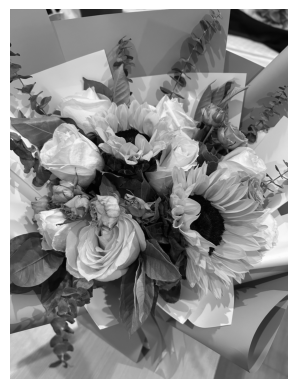

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np  
import os

figures_dir = image_path = os.path.join("..", "figures")

image_path = os.path.join(figures_dir, "example.jpg")
I = Image.open(image_path).convert('L')  # 'L' means the gray scale

I_2d = np.array(I)
print("I_2d.shape: ", I_2d.shape)

plt.imshow(I_2d, cmap='gray')  # show the image
plt.axis('off')     # turn down the axis
plt.show()


### Function definition

In [ ]:
from math import exp
import numpy as np
    

def K(x,y,wc,ws,sc,ss):
    '''Gaussian kernel function'''
    x = x/2
    y = y/2
    return wc/(sc**2) * exp(-(x**2+y**2)/(2*(sc**2))) - ws/(ss**2) * exp(-(x**2+y**2)/(2*(ss**2)))
def get_kernel_DoG(wc,ws,sc,ss,size=None):
    '''Difference of Gaussian kernel (Discrete matrix)'''
    if size is None:
        size = 6 * max(sc, ss)   # size of the kernel, cover [-3sigma, 3sigma]
    M = np.zeros((size, size))
    for i in range(size):
        y = size/2 - i
        for j in range(size):
            x = j - size/2
            M[i,j] += K(x,y,wc,ws,sc,ss)
    # Normalize the kernel
    # M = norm_matrix(M)
    return M

# def norm_matrix(M):
#     '''Normalize the matrix to [-1, 1]'''
#     M_min = np.min(M)
#     M_max = np.max(M)
#     return 2 * (M - M_min) / (M_max - M_min) - 1

### 1.1 How $K(x,y)$ change with each parameters

$$K(x, y) = \frac{w_c}{\sigma_c^2} \exp\left(-\frac{x^2 + y^2}{2\sigma_c^2}\right)
- \frac{w_s}{\sigma_s^2}\exp\left(-\frac{x^2 + y^2}{2\sigma_s^2}\right)$$

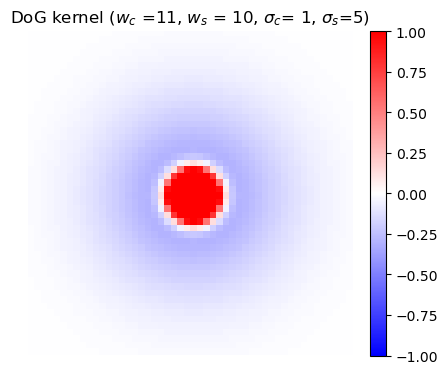

In [19]:
wc,ws,sc,ss = 11,10,1,5
kernel = get_kernel_DoG(wc,ws,sc,ss,size=50)

plt.figure(figsize=(10, 4))


# 红蓝双极伪彩色（正值为兴奋，负值为抑制）
plt.subplot(1, 2, 2)
plt.imshow(kernel, cmap='bwr', vmax=1, vmin=-1)
plt.title(f"DoG kernel ($w_c$ ={wc}, $w_s$ = {ws}, $\\sigma_c$= {sc}, $\\sigma_s$={ss})")
plt.colorbar(fraction=0.046, pad=0.04)

plt.tight_layout()
plt.axis('off')
# plt.savefig(os.path.join(figures_dir, f"DoG_kernel_wc{wc}ws{ws}sc{sc}ss{ss}.pdf"), bbox_inches='tight', pad_inches=0.1)
plt.show()

### 1.2 Compute the responses of the whole picture

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_5276/1381330108.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Response map\n($w_c$ ={wc}, $w_s$ = {ws}, $\sigma_c$= {sc}, $\sigma_s$={ss})")
/var/folders/ty/jw9csq0j64j3_w_b8kmz3b2h0000gn/T/ipykernel_5276/1381330108.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Response map\n($w_c$ ={wc}, $w_s$ = {ws}, $\sigma_c$= {sc}, $\sigma_s$={ss})")


Text(0.5, 1.0, 'Response map\n($w_c$ =11, $w_s$ = 10, $\\sigma_c$= 1, $\\sigma_s$=5)')

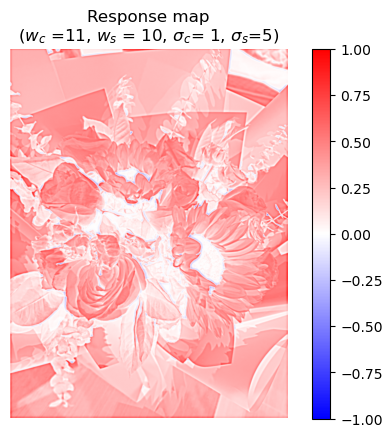

In [12]:
wc,ws,sc,ss = 11,10,1,5
M = get_kernel_DoG(wc,ws,sc,ss)

from scipy.signal import convolve2d
Response_map = convolve2d(I_2d, M, mode='same')

# Normolized for plot
Response_map_normolized = Response_map / np.max(np.abs(Response_map))

plt.imshow(Response_map_normolized, cmap='bwr', vmax=1, vmin=-1)
plt.axis("off")
plt.colorbar()
plt.title(f"Response map\n($w_c$ ={wc}, $w_s$ = {ws}, $\sigma_c$= {sc}, $\sigma_s$={ss})")
# plt.savefig(os.path.join(figures_dir, f"DoG_response_map_wc{wc}ws{ws}sc{sc}ss{ss}.pdf"), bbox_inches='tight', pad_inches=0.1)